In [1]:
import os
import re
import pysam    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import Data

In [2]:
Gus_WT_MUT_unfrozen = pd.read_csv('/gscratch/stergachislab/bmallo/large_home/ft_data/plasmid_mix_71923/plasmid_mix_unfrozen/Gus_plasmids/aligned_bams/ft_extract/Gus_WT_MUT_aligned_all.bed', sep='\t')

### View Data

In [3]:

Gus_WT_MUT_unfrozen_filtered = Gus_WT_MUT_unfrozen[(6432 <= Gus_WT_MUT_unfrozen['fiber_length']) & (Gus_WT_MUT_unfrozen['fiber_length'] <= 6482)]
Gus_WT = Gus_WT_MUT_unfrozen_filtered[Gus_WT_MUT_unfrozen_filtered['#ct'] == 'Gus_WT']
Gus_MUT = Gus_WT_MUT_unfrozen_filtered[Gus_WT_MUT_unfrozen_filtered['#ct'] == 'Gus_MUT']
# Gus_WT_MUT_unfrozen
# Gus_WT_MUT_unfrozen
# Gus_WT_MUT_unfrozen.hist(column='fiber_length', bins=100)
# Gus_WT_MUT_unfrozen['ref_nuc_lengths'] = Gus_WT_MUT_unfrozen['ref_nuc_lengths'].astype(str)
# Gus_WT_MUT_unfrozen['ref_nuc_lengths'] = Gus_WT_MUT_unfrozen['ref_nuc_lengths'].apply(lambda x: [int(num) for num in x.split(',') if num.strip().isdigit()])
# df_exploded = Gus_WT_MUT_unfrozen.explode('ref_nuc_lengths')
# df_exploded['ref_nuc_lengths'].hist(bins=100, range=(0, 500))
#print(Gus_WT_MUT_unfrozen['#ct'].dtype)
#Gus_WT_MUT_unfrozen['nuc_lengths'].dtype

In [6]:
Gus_MUT

,#ct,st,en,fiber,score,strand,sam_flag,HP,RG,fiber_length,...,ref_nuc_lengths,msp_starts,msp_lengths,ref_msp_starts,ref_msp_lengths,m6a,ref_m6a,m6a_qual,5mC,ref_5mC
64164,Gus_MUT,0,378,m84046_230715_053754_s4/240783041/ccs,32,+,2048,UNK,40ca4731/54--54,6462,...,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","711,888,1094,1395,1786,1989,2167,2337,2668,288...","46,47,184,241,17,1,3,33,54,29,39,29,40,26,32,5...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","2,3,5,9,11,15,18,32,38,39,43,47,53,55,59,60,67...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","255,255,255,255,255,255,255,255,255,255,255,25...","62,1531,1795,2344,2434,2530,2779,3156,3316,359...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
64165,Gus_MUT,0,3997,m84046_230715_053754_s4/263130822/ccs,23,+,0,UNK,40ca4731/54--54,6454,...,"-1,-1,-1,158,131,142,","376,965,1482,3555,4935,","454,372,1915,1249,526,","-1,-1,0,1089,2469,","-1,-1,931,1249,534,","0,5,11,13,18,19,20,23,25,33,34,40,42,45,47,57,...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","255,255,255,255,255,255,255,255,255,255,255,25...","37,53,59,73,97,278,530,550,560,648,664,723,739...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
64197,Gus_MUT,0,2344,m84046_230715_053754_s4/235213640/ccs,14,+,2048,UNK,40ca4731/54--54,6458,...,"-1,-1,746,736,622,","334,1940,2254,4860,5618,6241,","1,28,46,22,1,1,","-1,-1,-1,746,1504,2127,","-1,-1,-1,22,1,1,","1,2,3,4,334,1940,1967,2254,2299,4860,4881,5618...","-1,-1,-1,-1,-1,-1,-1,-1,-1,746,767,1504,2127,2...","255,255,255,255,255,254,255,255,255,254,254,25...","374,737,781,843,954,1140,1346,1565,1620,1701,1...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
64214,Gus_MUT,0,3179,m84046_230715_053754_s4/251926234/ccs,28,+,0,UNK,40ca4731/54--54,6455,...,"-1,-1,-1,-1,149,","797,1031,1151,1302,","127,8,37,2522,","-1,-1,-1,0,","-1,-1,-1,2353,","1,3,6,21,26,51,53,55,72,76,83,89,92,97,139,163...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","255,255,255,255,255,255,255,255,255,255,255,25...","41,49,61,74,231,246,288,516,571,589,623,677,71...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
64227,Gus_MUT,0,2129,m84046_230715_053754_s4/252514383/ccs,20,+,2048,UNK,40ca4731/54--54,6433,...,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","267,359,498,970,1103,1342,1565,1883,2380,3469,...","1,1,90,1,79,57,1,51,1,4,6,42,17,1,31,1,1,1,1,8...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","1,2,6,18,53,267,359,498,502,512,587,970,1103,1...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","255,255,255,255,255,255,255,255,255,255,255,25...","15,126,249,426,564,744,770,946,1016,1033,1263,...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129208,Gus_MUT,6406,6462,m84046_230715_053754_s4/138610709/ccs,10,-,2064,UNK,40ca4731/54--54,6447,...,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,","209,526,1213,1499,2087,2263,2703,3019,3197,380...","182,434,135,487,20,296,188,47,484,847,137,71,9...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,","2,4,6,16,20,26,28,34,43,210,213,218,219,221,22...","6408,6410,6412,6422,6426,6432,6434,6440,6449,-...","255,255,255,255,255,255,255,255,254,255,255,25...","23,253,313,349,358,363,582,714,740,748,794,811...","6429,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1..."
129212,Gus_MUT,6407,6462,m84046_230715_053754_s4/89589047/ccs,11,+,2048,UNK,40ca4731/54--54,6457,...,"-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","212,486,699,855,1110,1247,1384,1690,1832,1935,...","116,42,3,1,1,15,1,6,2,3,9,28,72,21,11,1,7,3,1,...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-...","1,3,5,6,41,58,72,161,212,273,276,307,314,326,3...","6408,6410,6412,6413,6448,-1,-1,-1,-1,-1,-1,-1,...","255,255,255,255,254,255,254,255,255,255

### Define filter_df function

In [33]:
def filter_df(input_df, min_length=0, max_length=float('inf'), min_nucleosomes=0, max_nucleosomes=float('inf')):
    # Add column for nucleosome count
    input_df['nuc_count'] = input_df['ref_nuc_lengths'].str.split(',').str.len()
    # Check if all necessary columns are present
    required_columns = ['#ct', 'fiber', 'fiber_length', 'ref_nuc_lengths', 'nuc_count']
    missing_columns = set(required_columns) - set(input_df.columns)
    if missing_columns:
        raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

    # Filter for necessary columns
    output_df = input_df[required_columns]

    # Filter by length
    output_df = output_df[(output_df['fiber_length'] >= min_length) & (output_df['fiber_length'] <= max_length)]

    # Filter by number of nucleosomes
    output_df = output_df[(output_df['nuc_count'] >= min_nucleosomes) & (output_df['nuc_count'] <= max_nucleosomes)]

    return output_df



### Run filter_df function

In [ ]:
Gus_WT_nuc = filter_df(Gus_WT, min_length=6432, max_length=6492, min_nucleosomes=0, max_nucleosomes=float('inf'))
Gus_WT_nuc['nuc_count'].hist(bins=30)

In [12]:
zmw_ids = list(Gus_MUT['fiber'])
print(len(zmw_ids))

6592


### Define filter_bam_by_zmw_id function

In [13]:
def filter_bam_by_zmw_id(bam_filename, dataframe, zmw_id_column, output_bam_filename):
    # Read the bam file
    bamfile = pysam.AlignmentFile(bam_filename, "rb")

    # Get the list of ZMW IDs from the dataframe
    zmw_ids = list(dataframe[zmw_id_column])

    # Create a new BAM file for writing filtered reads
    output_bam = pysam.AlignmentFile(output_bam_filename, "wb", header=bamfile.header)

    # Iterate through the reads in the original BAM file and write to the new BAM file
    for read in bamfile.fetch():
        if read.query_name in zmw_ids:
            if read.reference_name == "Gus_MUT":
                output_bam.write(read)

    # Close the BAM files
    bamfile.close()
    output_bam.close()

### Filter bams by zmw_id

In [14]:
filter_bam_by_zmw_id('/gscratch/stergachislab/bmallo/large_home/ft_data/plasmid_mix_71923/plasmid_mix_unfrozen/Gus_plasmids/aligned_bams/Gus_WT_MUT_aligned.bam', Gus_MUT, 'fiber', '/gscratch/stergachislab/bmallo/large_home/ft_data/plasmid_mix_71923/plasmid_mix_unfrozen/Gus_plasmids/Gus_MUT_reads/sorted_bams/full_length_Gus_MUT.bam')

### Filter_df function for nucleosome bed files

In [ ]:
def filter_nuc_df(input_df, min_length=0, max_length=float('inf'), min_nucleosomes=0, max_nucleosomes=float('inf')):
    # Add column for nucleosome count
    input_df['nuc_count'] = input_df['nuc_length'].str.split(',').str.len()
    # Check if all necessary columns are present
    required_columns = ['chrom', 'fiber', 'nuc_length', 'nuc_count']
    missing_columns = set(required_columns) - set(input_df.columns)
    if missing_columns:
        raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

    # Filter for necessary columns
    output_df = input_df[required_columns]

    # Filter by length
    output_df = output_df[(output_df['fiber_length'] >= min_length) & (output_df['fiber_length'] <= max_length)]

    # Filter by number of nucleosomes
    output_df = output_df[(output_df['nuc_count'] >= min_nucleosomes) & (output_df['nuc_count'] <= max_nucleosomes)]

    return output_df

### Visualize Data

In [50]:
Gus_WT_nuc['ref_nuc_lengths'].dtype
# Gus_WT_nuc_exploded = Gus_WT_nuc.explode('ref_nuc_lengths')
# Gus_WT_nuc_exploded

dtype('O')

### Function to extract nucleosome length and create a histogram

In [70]:
# Function to extract 'ref_nuc_lengths' as a Series and create a histogram
def plot_histogram(df):
    # Use regular expression to find numbers (integers and decimals) in the strings
    ref_lengths_str = df['ref_nuc_lengths'].replace('', pd.NA).dropna().str.cat(sep=',')
    ref_lengths = pd.Series(map(float, re.findall(r'\d+\.\d+|\d+', ref_lengths_str)))
    
    plt.hist(ref_lengths, bins=500, edgecolor='black', range=(2, 500))
    plt.xlabel('Lengths')
    plt.ylabel('Frequency')
    plt.title('Histogram of ref_nuc_lengths')
    plt.show()

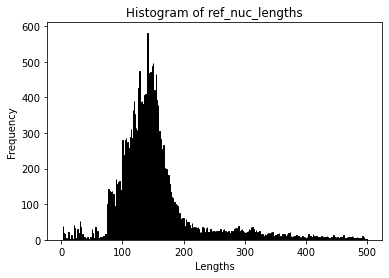

In [71]:
plot_histogram(Gus_WT_nuc)